In [14]:
def sci_notation_latex(value):
    exponent = int(np.log10(value))
    mantissa = value / 10**exponent
    return f'{mantissa:.1f} \\times 10^{{{exponent}}}'

In [15]:
def read_dataAtlas_complete(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[0]))
                y = float(parts[3])
                x_values.append(x)
                y_values.append(y)

    return x_values, y_values

In [16]:
def read_dataSimp_complete(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[1]))
                y = float(parts[3])
                x_values.append(x)
                y_values.append(y)

    return x_values, y_values

In [39]:
def graficador(alpha56, z_atlasc1, z_simp1):

    alpha56cristian = alpha56
    if(alpha56 == 4):
        alpha56 = 3.9e5
    elif(alpha56 == 5):
        alpha56 = 5.4e5
    elif(alpha56 == 6):
        alpha56 = 9.2e5

    z_atlasc = [x for x in z_atlasc1 if x > 300]

    z_simp = [y for x, y in zip(z_atlasc1, z_simp1) if x > 300]
    #print(shortened_porcentaje_salta)

    # Scatter plot for each data set
    plt.scatter(z_atlasc, z_simp, alpha=0.5, label='Atlas C Data Points', color='red', marker='x')
   
    M_4 = 10e6
    M_5 = 5.5e1
    M_6 = 7e1
    # Add the text to the plot
    # Adjust the y-axis limits to allow for more space below
    #plt.ylim(-1000, 6)
    plt.text(500, 100, f'$\\alpha_{{nb}}^{{56}} = {sci_notation_latex(alpha56)}$', fontsize=12, color='black')
    plt.text(500, 10, f'$M_{{4}} = {sci_notation_latex(M_4)}$', fontsize=12, color='black')
    plt.text(500, 1, f'$M_{{5}} = {sci_notation_latex(M_5)}$', fontsize=12, color='black')
    plt.text(500, 0.1, f'$M_{{6}} = {sci_notation_latex(M_6)}$', fontsize=12, color='black')

    # Add horizontal and vertical lines
    plt.axhline(y=0.1, color='black', linestyle='-')
    plt.axvline(x=300, color='black', linestyle='-')

    # Set log scale for both axes
    plt.xscale('log')
    plt.yscale('log')

    # Set labels and title
    plt.xlabel('delta z atlas')
    plt.ylabel(f'Deltaz atlas vs deltaz simple {alpha56cristian}')
    plt.title('Scatter Plot of X and Y Values (Log Scale)')

    # Show legend
    plt.legend(fontsize=12)

    # Show grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Save the plot to a file with higher quality
    plt.savefig(f'scatter_plot_zsimp_zatlas_corte{alpha56cristian}.png', format='png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

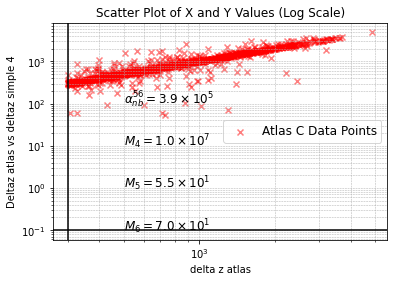

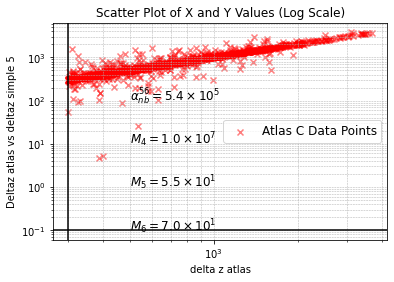

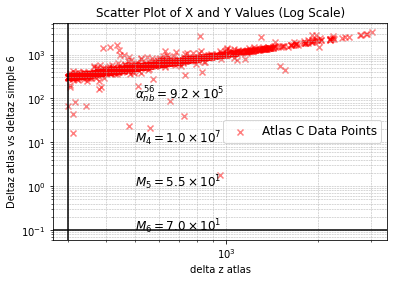

In [40]:
import matplotlib.pyplot as plt
import os
import numpy as np

for number_alpha56 in [4, 5, 6]:
    # Read the data from both files
    file_path_pt = f'eta_histoconstant{number_alpha56}.txt'

    #obtenemos los valores menores de 300
    z_simp, y_simp = read_dataSimp_complete(file_path_pt)

    z_atlasc, y_atlasc = read_dataAtlas_complete(file_path_pt)

    graficador(
    number_alpha56,
    z_atlasc,
    z_simp
    )